In [13]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [14]:

import gc
def loadXST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
        try:
         D=np.array(f[s]['values'])
         D2.append(D[:,sis][sis])
        except:
            continue;
    D2=np.array(D2)
    return D2


In [16]:
dhours=[]
dcnt=[]
opath='xst_mean'
fpath='xst'
dateformat='%Y-%m-%d-%H-%M'
dateformat2='%Y-%m-%d-%H'
from datetime import datetime,timedelta
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    for fn in files:
        ext=fn.split('.')[-1]
#    if ext!='h5': continue;
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        dtime=datetime.strptime(ftime, dateformat)
        #dtime=dtime+timedelta(hours=10/60)
        fhour=dtime.strftime(dateformat2)
        #print(band,ftime,dtime,fhour)
        if fhour in dhours: 
            dcnt[dhours.index(fhour)]+=1;
        else:
            dhours.append(fhour)
            dcnt.append(1)
print(dhours,dcnt)

40960
['2022-10-20-13', '2022-10-20-14', '2022-10-20-15', '2022-10-20-16', '2022-10-20-17', '2022-10-20-18', '2022-10-20-19', '2022-10-20-20', '2022-10-20-22', '2022-10-20-23', '2022-10-21-00', '2022-10-21-01', '2022-10-21-02', '2022-10-21-03', '2022-10-21-04', '2022-10-21-06', '2022-10-21-07', '2022-10-21-08', '2022-10-21-09', '2022-10-21-10', '2022-10-21-11', '2022-10-21-12', '2022-10-21-14', '2022-10-21-15', '2022-10-21-16', '2022-10-21-17', '2022-10-21-18', '2022-10-21-19', '2022-10-21-20', '2022-10-21-22', '2022-10-21-23', '2022-10-22-00', '2022-10-22-01', '2022-10-22-02', '2022-10-22-03', '2022-10-22-04', '2022-10-22-05', '2022-10-22-07', '2022-10-22-08', '2022-10-22-09', '2022-10-22-10', '2022-10-22-11', '2022-10-22-12', '2022-10-22-13', '2022-10-22-15', '2022-10-22-16', '2022-10-22-17', '2022-10-22-18', '2022-10-22-19', '2022-10-22-20', '2022-10-22-21', '2022-10-22-23', '2022-10-23-00', '2022-10-23-01', '2022-10-23-02', '2022-10-23-03', '2022-10-23-04', '2022-10-23-05', '2022-1

In [17]:
#sis=[i for i in range(18)]
meas_RCU2L = [0, 1, 2,3,4,5,8,9,10,11]
sis = [3*i+j for i in meas_RCU2L for j in range(3)]

#sis=[ 0, 1, 2, 3, 4, 5,72,73,74,75,76, 77,90,91,92,93,94,95]
nsi=len(sis)

for ic,shour in enumerate(dhours[:]):
    if dcnt[ic]!=512: continue;
    day=int(shour[8:8+2])
    hour=int(shour[11:11+2])
#    if day<24: continue;
#    if hour<12: continue;
    print(shour,day,hour)
#    continue;
    xst=np.zeros([512,nsi,nsi],dtype='complex')
    cnt=np.zeros([512],dtype='int')
    for fn in files:
        ext=fn.split('.')[-1]
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        dtime=datetime.strptime(ftime, dateformat)
        dtime=dtime+timedelta(hours=10/60)
        fhour=dtime.strftime(dateformat2)
#        fhour=ftime[:-3]
        if fhour!=shour: continue;
        try:
          D=loadXST(fpath+"/"+fn,sis);
        except:
          continue;
        cnt[band]+=D.shape[0];
        xst[band]+=D.sum(axis=0);
    xst/=cnt[:,np.newaxis,np.newaxis];
    np.savez(opath+"/xst_mean_"+shour,xst=xst,cnt=cnt)


2022-10-20-14 20 14
2022-10-20-15 20 15
2022-10-20-16 20 16
2022-10-20-17 20 17
2022-10-20-18 20 18
2022-10-20-19 20 19


/tmp/ipykernel_1020993/3316914112.py:34: RuntimeWarning: invalid value encountered in true_divide
  xst/=cnt[:,np.newaxis,np.newaxis];


2022-10-20-22 20 22
2022-10-20-23 20 23
2022-10-21-00 21 0
2022-10-21-01 21 1
2022-10-21-02 21 2
2022-10-21-03 21 3
2022-10-21-04 21 4
2022-10-21-07 21 7
2022-10-21-08 21 8
2022-10-21-09 21 9
2022-10-21-10 21 10
2022-10-21-11 21 11
2022-10-21-12 21 12
2022-10-21-15 21 15
2022-10-21-16 21 16
2022-10-21-17 21 17
2022-10-21-18 21 18
2022-10-21-19 21 19
2022-10-21-20 21 20
2022-10-21-23 21 23
2022-10-22-00 22 0
2022-10-22-01 22 1
2022-10-22-02 22 2
2022-10-22-03 22 3
2022-10-22-04 22 4
2022-10-22-07 22 7
2022-10-22-08 22 8
2022-10-22-09 22 9
2022-10-22-10 22 10
2022-10-22-11 22 11
2022-10-22-12 22 12
2022-10-22-13 22 13
2022-10-22-16 22 16
2022-10-22-17 22 17
2022-10-22-18 22 18
2022-10-22-19 22 19
2022-10-22-20 22 20
2022-10-22-21 22 21
2022-10-23-00 23 0
2022-10-23-01 23 1
2022-10-23-02 23 2
2022-10-23-03 23 3
2022-10-23-04 23 4
2022-10-23-05 23 5
2022-10-23-08 23 8
2022-10-23-09 23 9
2022-10-23-10 23 10
2022-10-23-11 23 11
2022-10-23-12 23 12
2022-10-23-13 23 13
2022-10-23-17 23 17
2022

/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: Ru

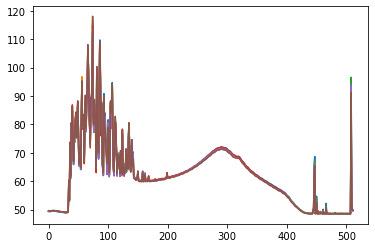

In [5]:
for si in range(len(sis)):
    plt.plot(10*np.log10(np.abs(xst[:,si,si])))

In [6]:
def LoadFiles(fpath):
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    return
    Data=[]
    Bands=[]
    for f in files:
        ext=f.split('.')[-1]
        if ext!='h5': continue;
        s=f.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        try:
         D=loadXST(join(fpath,f));
         D=np.array(D)
         print("band=",band," time=",ftime," Data size=",D.shape)
         Bands.append(band)
         Data.append(D)
        except:
         print('Can not open',f)
        gc.collect()
    return Bands,Data
